<h2>Imports and Setup</h2>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

In [2]:
listings = pd.read_csv('listings-summary.csv')

<h2>Dataset Explortation</h2>

In [3]:
listings.shape

(37548, 18)

In [4]:
listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                             float64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

In [5]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle Sanctuary,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Allen & Irina,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185,4,NaN
2,6872,Uptown Sanctuary w/ Private Bath (Month to Month),16104,Kae,Manhattan,East Harlem,40.80107,-73.94255,Private room,65.0,30,1,2022-06-05,0.03,2,83,0,NaN
3,6990,UES Beautiful Blue Room,16800,Cyn,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Joelle,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.08,2,0,0,NaN


In [6]:
# Clean NAs
listings['reviews_per_month'].fillna(0,inplace=True)

In [7]:
# Drop host name column
listings.drop(['host_name'], axis=1, inplace=True)

<h2>Analysis & Visualizations</h2>

<h3>Listings by Host</h3>

In [8]:
top_hosts = listings['host_id'].value_counts().head(10)

[Text(0, 0, '107434423'),
 Text(1, 0, '3223938'),
 Text(2, 0, '446820235'),
 Text(3, 0, '305240193'),
 Text(4, 0, '19303369'),
 Text(5, 0, '501999278'),
 Text(6, 0, '200239515'),
 Text(7, 0, '162280872'),
 Text(8, 0, '204704622'),
 Text(9, 0, '501499086')]

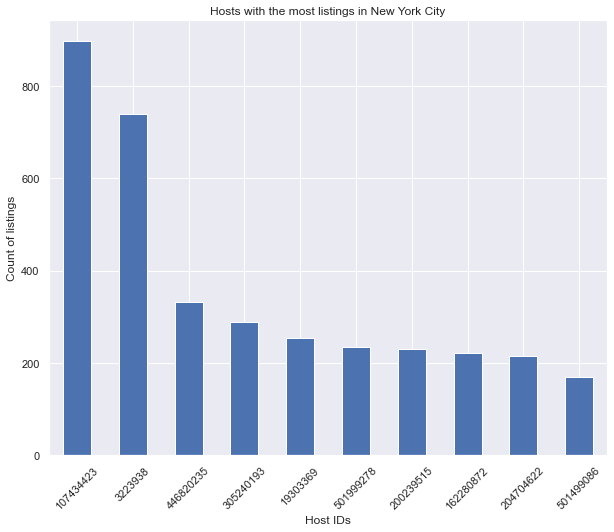

In [9]:
# Create bar chart with seaborn
sns.set(rc={'figure.figsize':(10,8)})
top_hosts_bar = top_hosts.plot(kind='bar')
# Set axes
top_hosts_bar.set_xlabel('Host IDs')
top_hosts_bar.set_ylabel('Count of listings')
# Adjust labels
top_hosts_bar.set_title('Hosts with the most listings in New York City')
top_hosts_bar.set_xticklabels(top_hosts_bar.get_xticklabels(), rotation=45)

<h3>Listings by Bourough</h3>

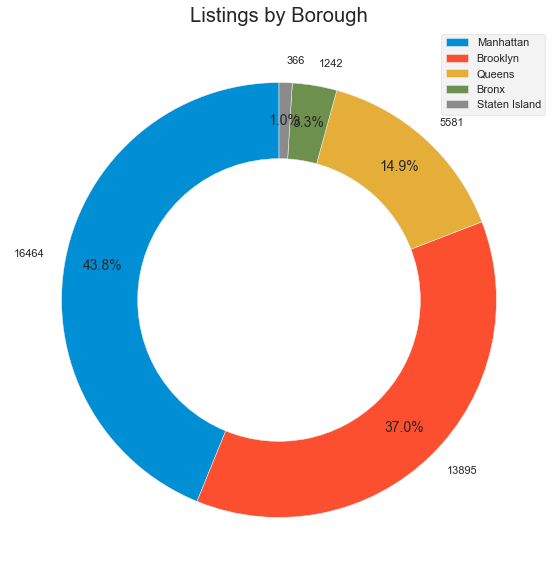

In [10]:
# Create list of bouroughs by indexing neighbourhood_group values
labels = listings.neighbourhood_group.value_counts().index
# Define shape by count of listings in each bourough
shape = listings.neighbourhood_group.value_counts().values

# Define figure size
plt.figure(figsize=(10,10))
# Add color formatting
plt.style.use('fivethirtyeight')
# Define pie chart with percentage labels
plt.pie(shape, labels=shape, autopct = '%1.1f%%', startangle=90, wedgeprops=dict(width=0.35), pctdistance=0.825)
# Add legend
plt.legend(labels)
# Add title
plt.title("Listings by Borough")
# Display pie chart
plt.show()

<h4>Find Min and Max Long/Lat values for mapping</h4>

In [11]:
coord = listings.loc[:,['longitude','latitude']]
coord.describe()

,longitude,latitude
count,37548.000000,37548.000000
mean,-73.946768,40.728667
std,0.054777,0.056510
min,-74.251907,40.500366
25%,-73.983042,40.688400
50%,-73.954420,40.725990
75%,-73.927600,40.762410
max,-73.713650,40.911390


<h3>Map Listings, Color Coordinated by Borough</h3>

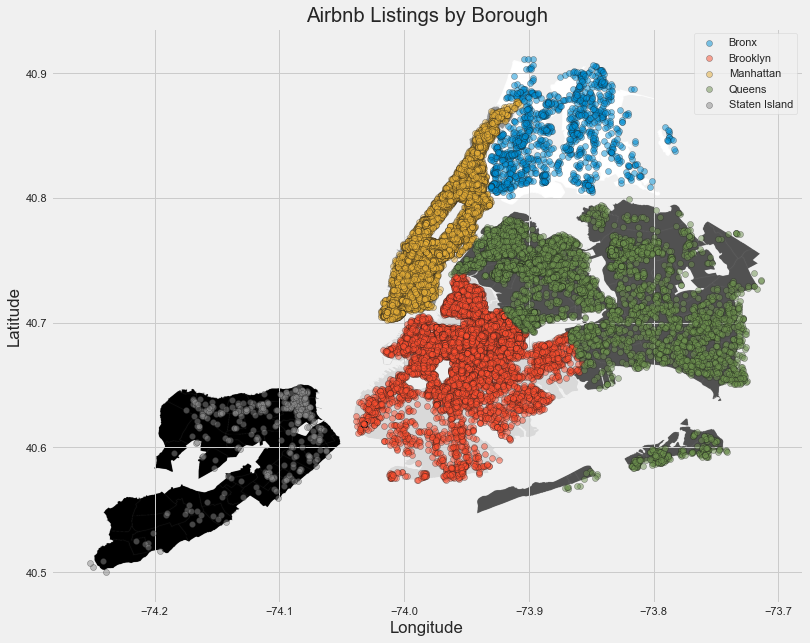

In [12]:
# Define plot size
plt.figure(figsize=(12, 12))
# Define color groups
plt.style.use('fivethirtyeight')

BBox = (-74.2829793, -73.6804367, 40.47516405, 40.936502950000005)
bg_map = plt.imread('nyc_neighbourhoods_map_bw.png')
plt.imshow(bg_map,zorder=0,extent=BBox)
ax = plt.gca()

groups = listings.groupby('neighbourhood_group')
# Plot points
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
# Add title, labels, and legend and show
plt.title("Airbnb Listings by Borough")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

<h3>Density Map</h3>

In [13]:
# Create folium map centered on mean coordinates from above
map_folium = folium.Map([40.728667, -73.946768],zoom_start=10.0)
# Create heat map over folium map
HeatMap(listings[['latitude','longitude']].dropna(),radius=10, gradient={0.2:'blue',0.4:'purple',0.6:'orange',0.8:'red', 1.0: 'darkred'}).add_to(map_folium)
# Show map
display(map_folium)

<h3>Examine Price Data</h3>

<h4>Drop N/A and describe data</h4>

In [14]:
prices = listings['price'].dropna()
prices.describe()

count    22741.000000
mean       216.737654
std        380.617571
min          8.000000
25%         85.000000
50%        149.000000
75%        250.000000
max      20000.000000
Name: price, dtype: float64

<h4>Create boxplot to visualize</h4>

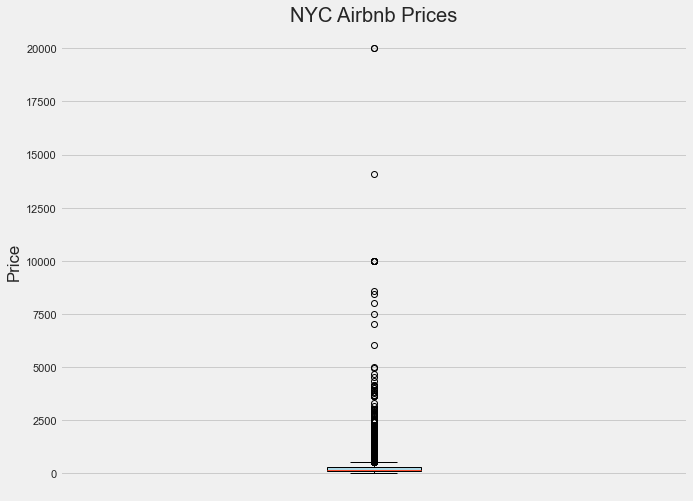

In [15]:
# Create box plot for prices
plt.figure(figsize=(10, 8))
plt.boxplot(prices, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))

# Labels and title
plt.title('NYC Airbnb Prices')
plt.ylabel('Price')
plt.xticks([])

# Show the plot
plt.show()

<h4>Identify and remove outliers</h4>

In [16]:
# Calculate Q1, Q3, and IQR
Q1 = prices.quantile(0.25)
Q3 = prices.quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = prices[(prices < lower_bound) | (prices > upper_bound)]
print(f"Number of outliers: {len(outliers)}")
print(f"Total data points: {len(prices)}")
print(f"{round(len(outliers) / len(prices)*100, 2)}%")

# Filter data to remove outliers
filtered_prices = prices[(prices >= lower_bound) & (prices <= upper_bound)]

Number of outliers: 1463
Total data points: 22741
6.43%


<h3>Create boxplots with outliers removed</h3>

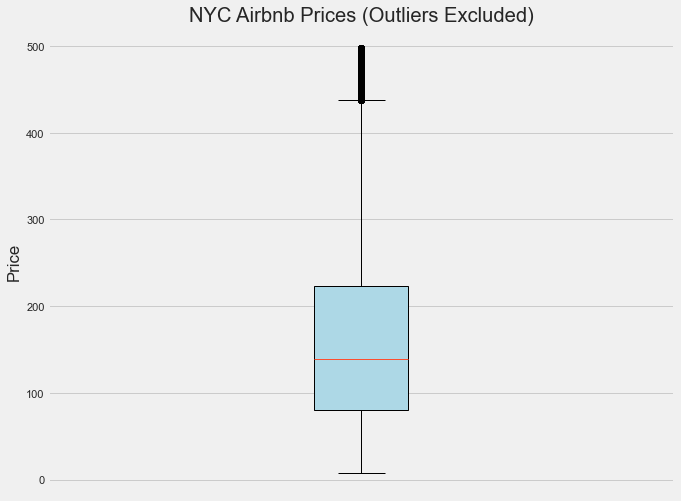

In [17]:
# Create updated boxplot
plt.figure(figsize=(10, 8))
plt.boxplot(filtered_prices, vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))


# Labels and title
plt.title('NYC Airbnb Prices (Outliers Excluded)')
plt.ylabel('Price')
plt.xticks([])

# Show the plot
plt.show()

<h3>Create Price Heat Map</h3>

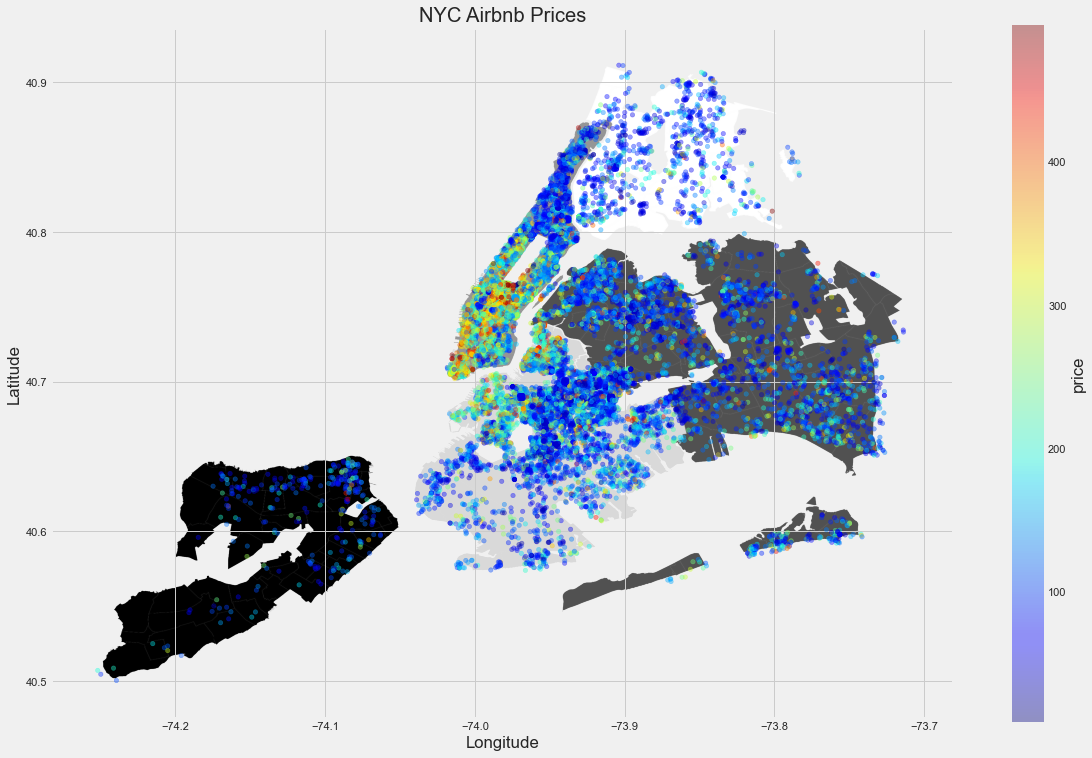

In [18]:
# Filter data to remove outliers
filtered_listings = listings[(listings['price'] >= lower_bound) & (listings['price'] <= upper_bound)]

# Create price map of NYC
plt.figure(figsize=(18,12))
sg_map = plt.imread('nyc_neighbourhoods_map_bw.png')
plt.imshow(sg_map,zorder=0,extent=BBox)
ax = plt.gca()
filtered_listings.plot(kind='scatter',x='longitude',y='latitude',label='Listing Location', c='price', ax=ax, cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5, legend=False)

plt.title("NYC Airbnb Prices")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<h3>Boxplot Prices by Borough</h3>

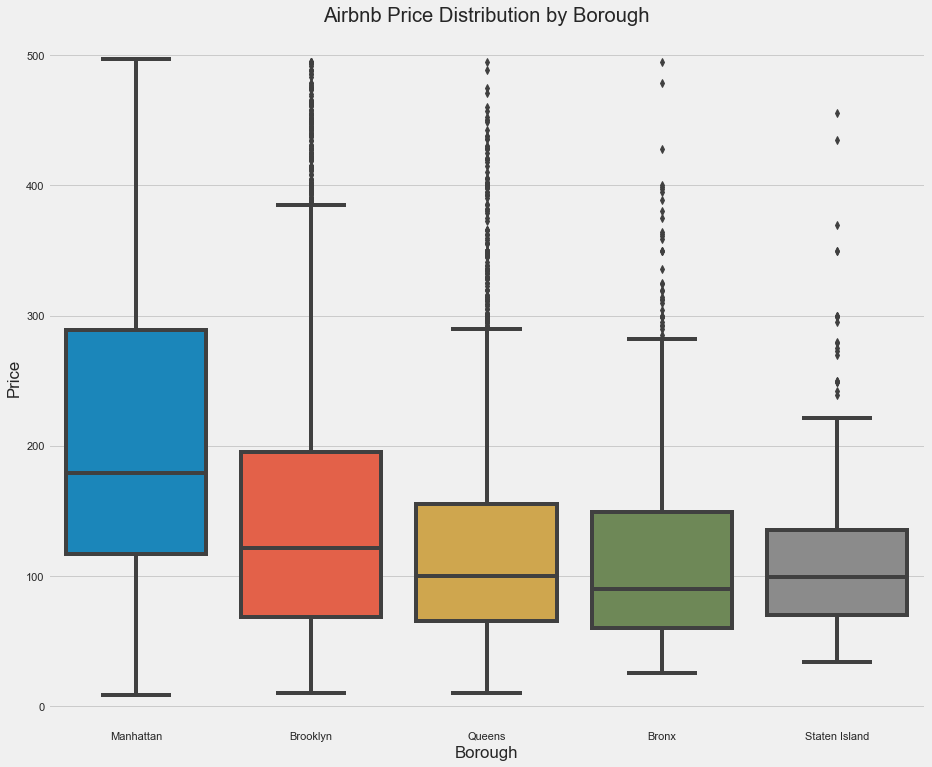

In [19]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(14,12))
sns.boxplot(y='price',x='neighbourhood_group',data = filtered_listings)
plt.title('Airbnb Price Distribution by Borough')
plt.xlabel('Borough')
plt.ylabel('Price')
plt.show()

<h3>Listing Type by Borough</h3>

In [20]:
listing_types=listings.groupby(['neighbourhood_group', 'room_type']).size()
listing_types

neighbourhood_group  room_type      
Bronx                Entire home/apt      476
                     Private room         742
                     Shared room           24
Brooklyn             Entire home/apt     6733
                     Hotel room            21
                     Private room        6978
                     Shared room          163
Manhattan            Entire home/apt    10492
                     Hotel room           501
                     Private room        5321
                     Shared room          150
Queens               Entire home/apt     2052
                     Hotel room             7
                     Private room        3439
                     Shared room           83
Staten Island        Entire home/apt      180
                     Private room         181
                     Shared room            5
dtype: int64

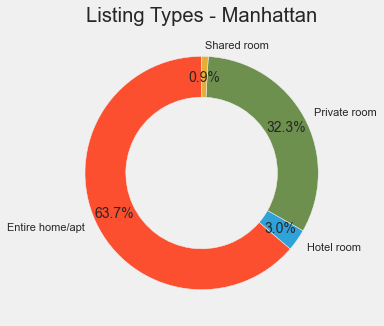

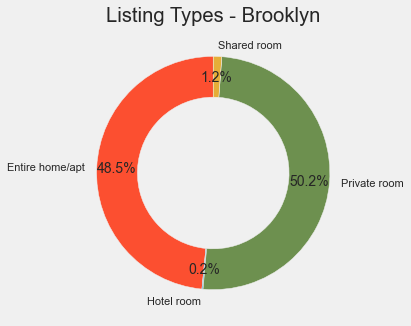

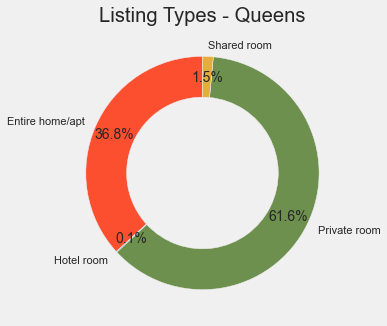

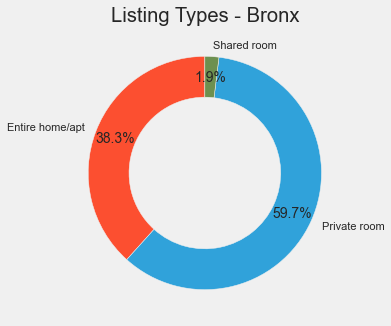

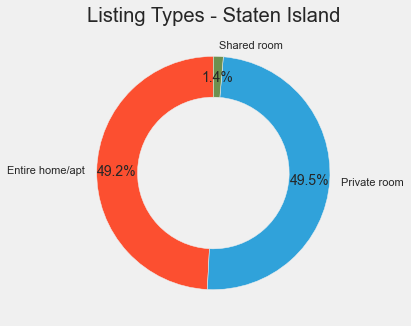

In [21]:
# Define fivethirtyeight color dictionary to ensure colors are applied consistently across charts
color_dict = {'Private room': '#30a2da', 'Entire home/apt' : '#fc4f30', 'Shared room' : '#e5ae38', 'Hotel room' : '#6d904f' }
# Get room types
room_types = listings['room_type'].value_counts().index

# Define boroughs to iterate through
boroughs = listings.neighbourhood_group.value_counts().index
for borough in boroughs:
    # Define figure size
    plt.figure(figsize=(5,5))
    # Add color formatting
    colors = [color_dict[i] for i in room_types]
    # Define pie chart with percentage labels
    plt.pie(listing_types[borough], labels = listing_types[borough].index, colors=colors, autopct = '%1.1f%%', startangle=90, wedgeprops=dict(width=0.35), pctdistance=0.825)
    # Add title
    plt.title(f"Listing Types - {borough}")
    # Display pie chart
    plt.show()

<h3>Rating vs. Price</h3>

<h4>Filter out listings with less than 5 reviews</h4>

In [30]:
min_reviews = listings[listings['number_of_reviews'] >= 5]
min_reviews.head()

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle Sanctuary,2845,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240.0,30,49,2022-06-21,0.27,3,365,0,NaN
1,6848,Only 2 stops to Manhattan studio,15991,Brooklyn,Williamsburg,40.70935,-73.95342,Entire home/apt,83.0,30,195,2024-10-05,1.04,1,185,4,NaN
3,6990,UES Beautiful Blue Room,16800,Manhattan,East Harlem,40.78778,-73.94759,Private room,71.0,30,250,2024-10-31,1.37,1,284,4,NaN
4,7064,"Amazing location! Wburg. Large, bright & tranquil",17297,Brooklyn,Williamsburg,40.71248,-73.95881,Private room,NaN,30,13,2022-09-12,0.08,2,0,0,NaN
5,7097,"Perfect for Your Parents, With Garden & Patio",17571,Brooklyn,Fort Greene,40.69194,-73.97389,Private room,205.0,2,390,2024-10-27,2.16,2,215,38,OSE-STRREG-0000008


In [ ]:
# Define plot size
plt.figure(figsize=(12, 12))
# Define color groups
plt.style.use('fivethirtyeight')

BBox = (-74.2829793, -73.6804367, 40.47516405, 40.936502950000005)
bg_map = plt.imread('nyc_neighbourhoods_map_bw.png')
plt.imshow(bg_map,zorder=0,extent=BBox)
ax = plt.gca()

groups = listings.groupby('neighbourhood_group')
# Plot points
for name,group in groups :
    plt.scatter(group['longitude'],group['latitude'],label=name,alpha=0.5, edgecolors='k')
# Add title, labels, and legend and show
plt.title("Airbnb Listings by Borough")
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(10,10))
plt.style.use('fivethirtyeight')

plt.scatter()
plt.title("")
plt.xlabel("")
plt.ylabel("")
plt.